<h2>Breast Cancer Wisconsin Challenge<h2>

<h3>1. Inspecionar os dados de treinamento. Quantos exemplos
há de cada classe? Qual o intervalo de cada feature?<h3>

In [ ]:


#bibliotecas
# Read and manipulate data
import numpy as np
import pandas as pd

# DataViz
import matplotlib.pyplot as plt
import seaborn as sns

# Split data
from sklearn.model_selection import train_test_split

# Build linear model for statistical analysis and prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant


# Impute missing values
from sklearn.impute import SimpleImputer

# Performance metrics
import sklearn.metrics as metrics
from sklearn.metrics import (classification_report,
                            confusion_matrix,
                            recall_score,
                            accuracy_score,
                            precision_score,
                            f1_score,
                            roc_curve,
                            roc_auc_score)

# Imbalanced data (Oversample and Undersample)
from imblearn.over_sampling import SMOTE

In [2]:
#carregar dados
df = pd.read_csv('Data/breastCancer_train.csv')
df_test = pd.read_csv('Data/breastCancer_test.csv')

In [3]:
#Análise dos dados
df.info()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371 entries, 0 to 370
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    371 non-null    int64 
 1   clump.thickness       371 non-null    int64 
 2   unif.cell.size        371 non-null    int64 
 3   unif.cell.shape       371 non-null    int64 
 4   marginal.adhesion     371 non-null    int64 
 5   epithelial.cell.size  371 non-null    int64 
 6   bare.nuclei           371 non-null    object
 7   bland.chromatin       371 non-null    int64 
 8   normal.nucleoli       371 non-null    int64 
 9   mitoses               371 non-null    int64 
 10  class                 371 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 32.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328 entries, 0 to 327
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                -----------

In [4]:
df.describe()

,id,clump.thickness,unif.cell.size,unif.cell.shape,marginal.adhesion,epithelial.cell.size,bland.chromatin,normal.nucleoli,mitoses,class
count,3.710000e+02,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000
mean,1.103658e+06,3.016173,1.417790,1.541779,1.412399,2.159030,2.156334,1.358491,1.097035,2.026954
std,7.956670e+05,1.752144,1.237087,1.311181,1.065304,1.062401,1.163560,1.262045,0.662727,0.230923
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.798590e+05,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000
50%,1.173347e+06,3.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
75%,1.240152e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
max,1.345435e+07,8.000000,10.000000,10.000000,9.000000,10.000000,7.000000,10.000000,8.000000,4.000000


In [5]:
df_test.describe()

,id,clump.thickness,unif.cell.size,unif.cell.shape,marginal.adhesion,epithelial.cell.size,bland.chromatin,normal.nucleoli,mitoses,class
count,3.280000e+02,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000
mean,1.035561e+06,6.003049,5.076220,5.091463,4.384146,4.411585,4.887195,4.573171,2.146341,3.439024
std,3.066755e+05,2.949626,3.319433,3.193675,3.379013,2.547071,2.681244,3.549667,2.279396,0.899848
min,6.337500e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.645348e+05,4.000000,2.000000,2.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
50%,1.169734e+06,5.000000,5.000000,5.000000,3.000000,4.000000,4.000000,3.000000,1.000000,4.000000
75%,1.228777e+06,9.000000,8.000000,8.000000,8.000000,6.000000,7.000000,8.000000,2.000000,4.000000
max,1.371920e+06,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [6]:
#Substituir missing values da coluna bare.nuclei
hp_is_digit = df['bare.nuclei'].str.isdigit()

In [7]:
df.loc[hp_is_digit == False]

,id,clump.thickness,unif.cell.size,unif.cell.shape,marginal.adhesion,epithelial.cell.size,bare.nuclei,bland.chromatin,normal.nucleoli,mitoses,class
9,1057067,1,1,1,1,1,?,1,1,1,2
31,1241232,3,1,4,1,2,?,3,1,1,2
34,1197510,5,1,1,1,2,?,3,1,1,2
90,1184840,1,1,3,1,2,?,2,1,1,2
118,704168,4,6,5,6,7,?,4,9,1,2
119,61634,5,4,3,1,2,?,2,3,1,2
194,1238464,1,1,1,1,1,?,2,1,1,2
210,1096800,6,6,6,9,6,?,7,8,1,2
249,733639,3,1,1,1,2,?,3,1,1,2
283,1193683,1,1,2,1,3,?,1,1,1,2


In [8]:
df.replace('?', np.nan, inplace=True)
df_test.replace('?', np.nan, inplace=True)
df.loc[hp_is_digit == False]

,id,clump.thickness,unif.cell.size,unif.cell.shape,marginal.adhesion,epithelial.cell.size,bare.nuclei,bland.chromatin,normal.nucleoli,mitoses,class
9,1057067,1,1,1,1,1,NaN,1,1,1,2
31,1241232,3,1,4,1,2,NaN,3,1,1,2
34,1197510,5,1,1,1,2,NaN,3,1,1,2
90,1184840,1,1,3,1,2,NaN,2,1,1,2
118,704168,4,6,5,6,7,NaN,4,9,1,2
119,61634,5,4,3,1,2,NaN,2,3,1,2
194,1238464,1,1,1,1,1,NaN,2,1,1,2
210,1096800,6,6,6,9,6,NaN,7,8,1,2
249,733639,3,1,1,1,2,NaN,3,1,1,2
283,1193683,1,1,2,1,3,NaN,1,1,1,2


In [9]:
# Converter a coluna como NaN para float
df['bare.nuclei'] = df['bare.nuclei'].astype(float)
df_test['bare.nuclei'] = df_test['bare.nuclei'].astype(float)
df.info()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371 entries, 0 to 370
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    371 non-null    int64  
 1   clump.thickness       371 non-null    int64  
 2   unif.cell.size        371 non-null    int64  
 3   unif.cell.shape       371 non-null    int64  
 4   marginal.adhesion     371 non-null    int64  
 5   epithelial.cell.size  371 non-null    int64  
 6   bare.nuclei           358 non-null    float64
 7   bland.chromatin       371 non-null    int64  
 8   normal.nucleoli       371 non-null    int64  
 9   mitoses               371 non-null    int64  
 10  class                 371 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 32.0 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328 entries, 0 to 327
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------             

In [10]:
#Substituir missing values da coluna bare.nuclei com a mediana (1)
df['bare.nuclei'].fillna(df['bare.nuclei'].median(), inplace=True)
df_test['bare.nuclei'].fillna(df_test['bare.nuclei'].median(), inplace=True)

In [11]:
# Converter a coluna como NaN para float
df['bare.nuclei'] = df['bare.nuclei'].astype(int)
df_test['bare.nuclei'] = df_test['bare.nuclei'].astype(int)

In [12]:
#Converter a coluna Class para o padrão 0/1
df['class'].replace(2,1, inplace=True)
df['class'].replace(4,0, inplace=True)
df_test['class'].replace(2,1, inplace=True)
df_test['class'].replace(4,0, inplace=True)

In [13]:
#Verificar a quantidade de classificações
df['class'].value_counts()

class
1    366
0      5
Name: count, dtype: int64

In [14]:
df['class'].value_counts(normalize=True)

class
1    0.986523
0    0.013477
Name: proportion, dtype: float64

In [16]:
df_test['class'].value_counts(normalize=True)

class
0    0.719512
1    0.280488
Name: proportion, dtype: float64

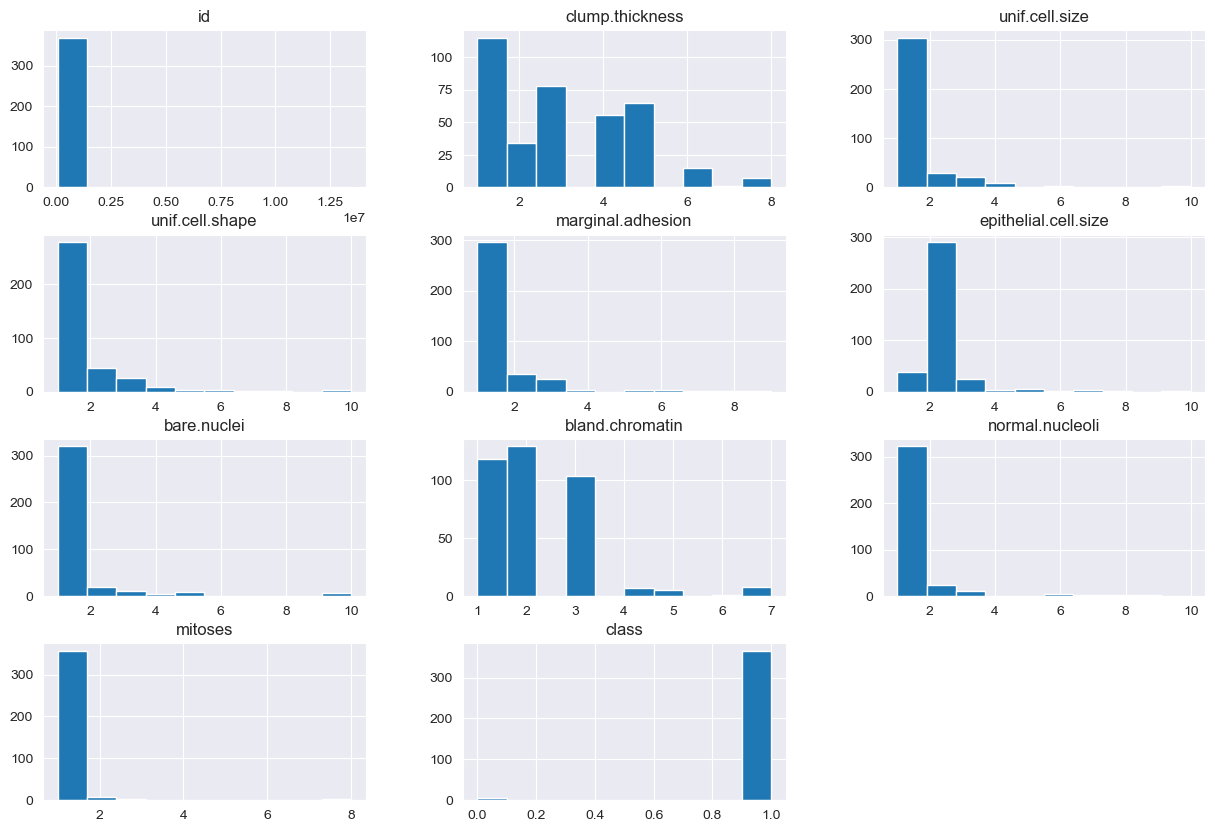

In [17]:
sns.set_style('darkgrid')
df.hist(figsize=(15,10))
plt.show()

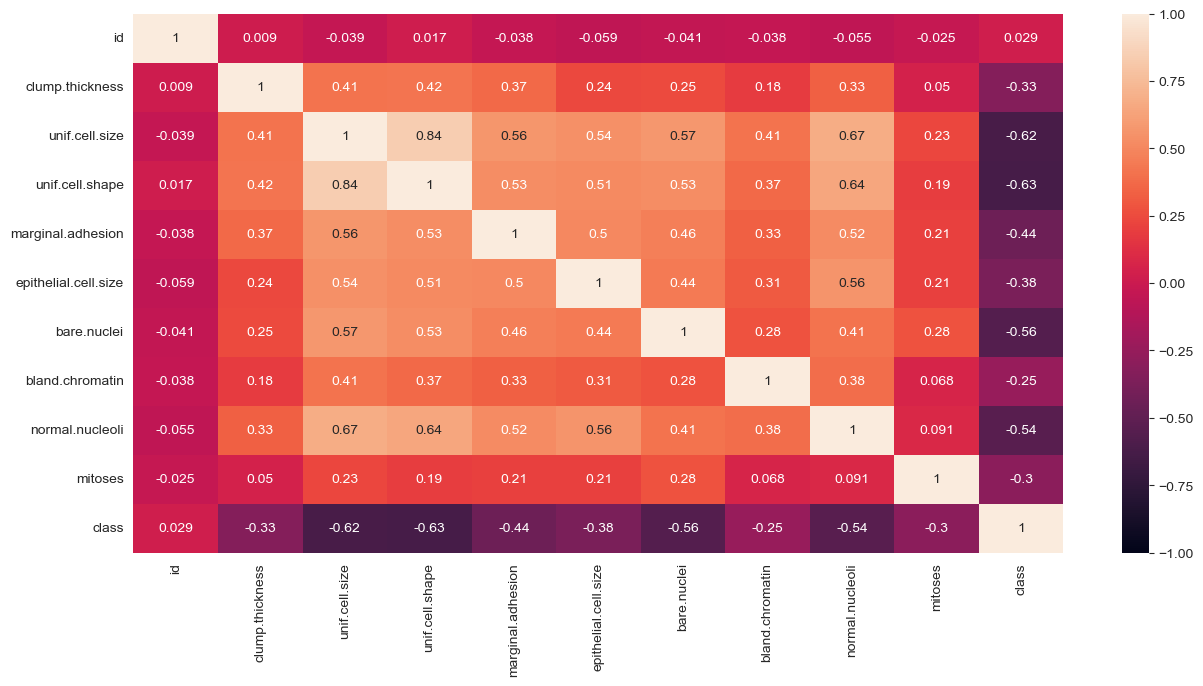

In [18]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1)
plt.show()

/Users/rafaelpadovani/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


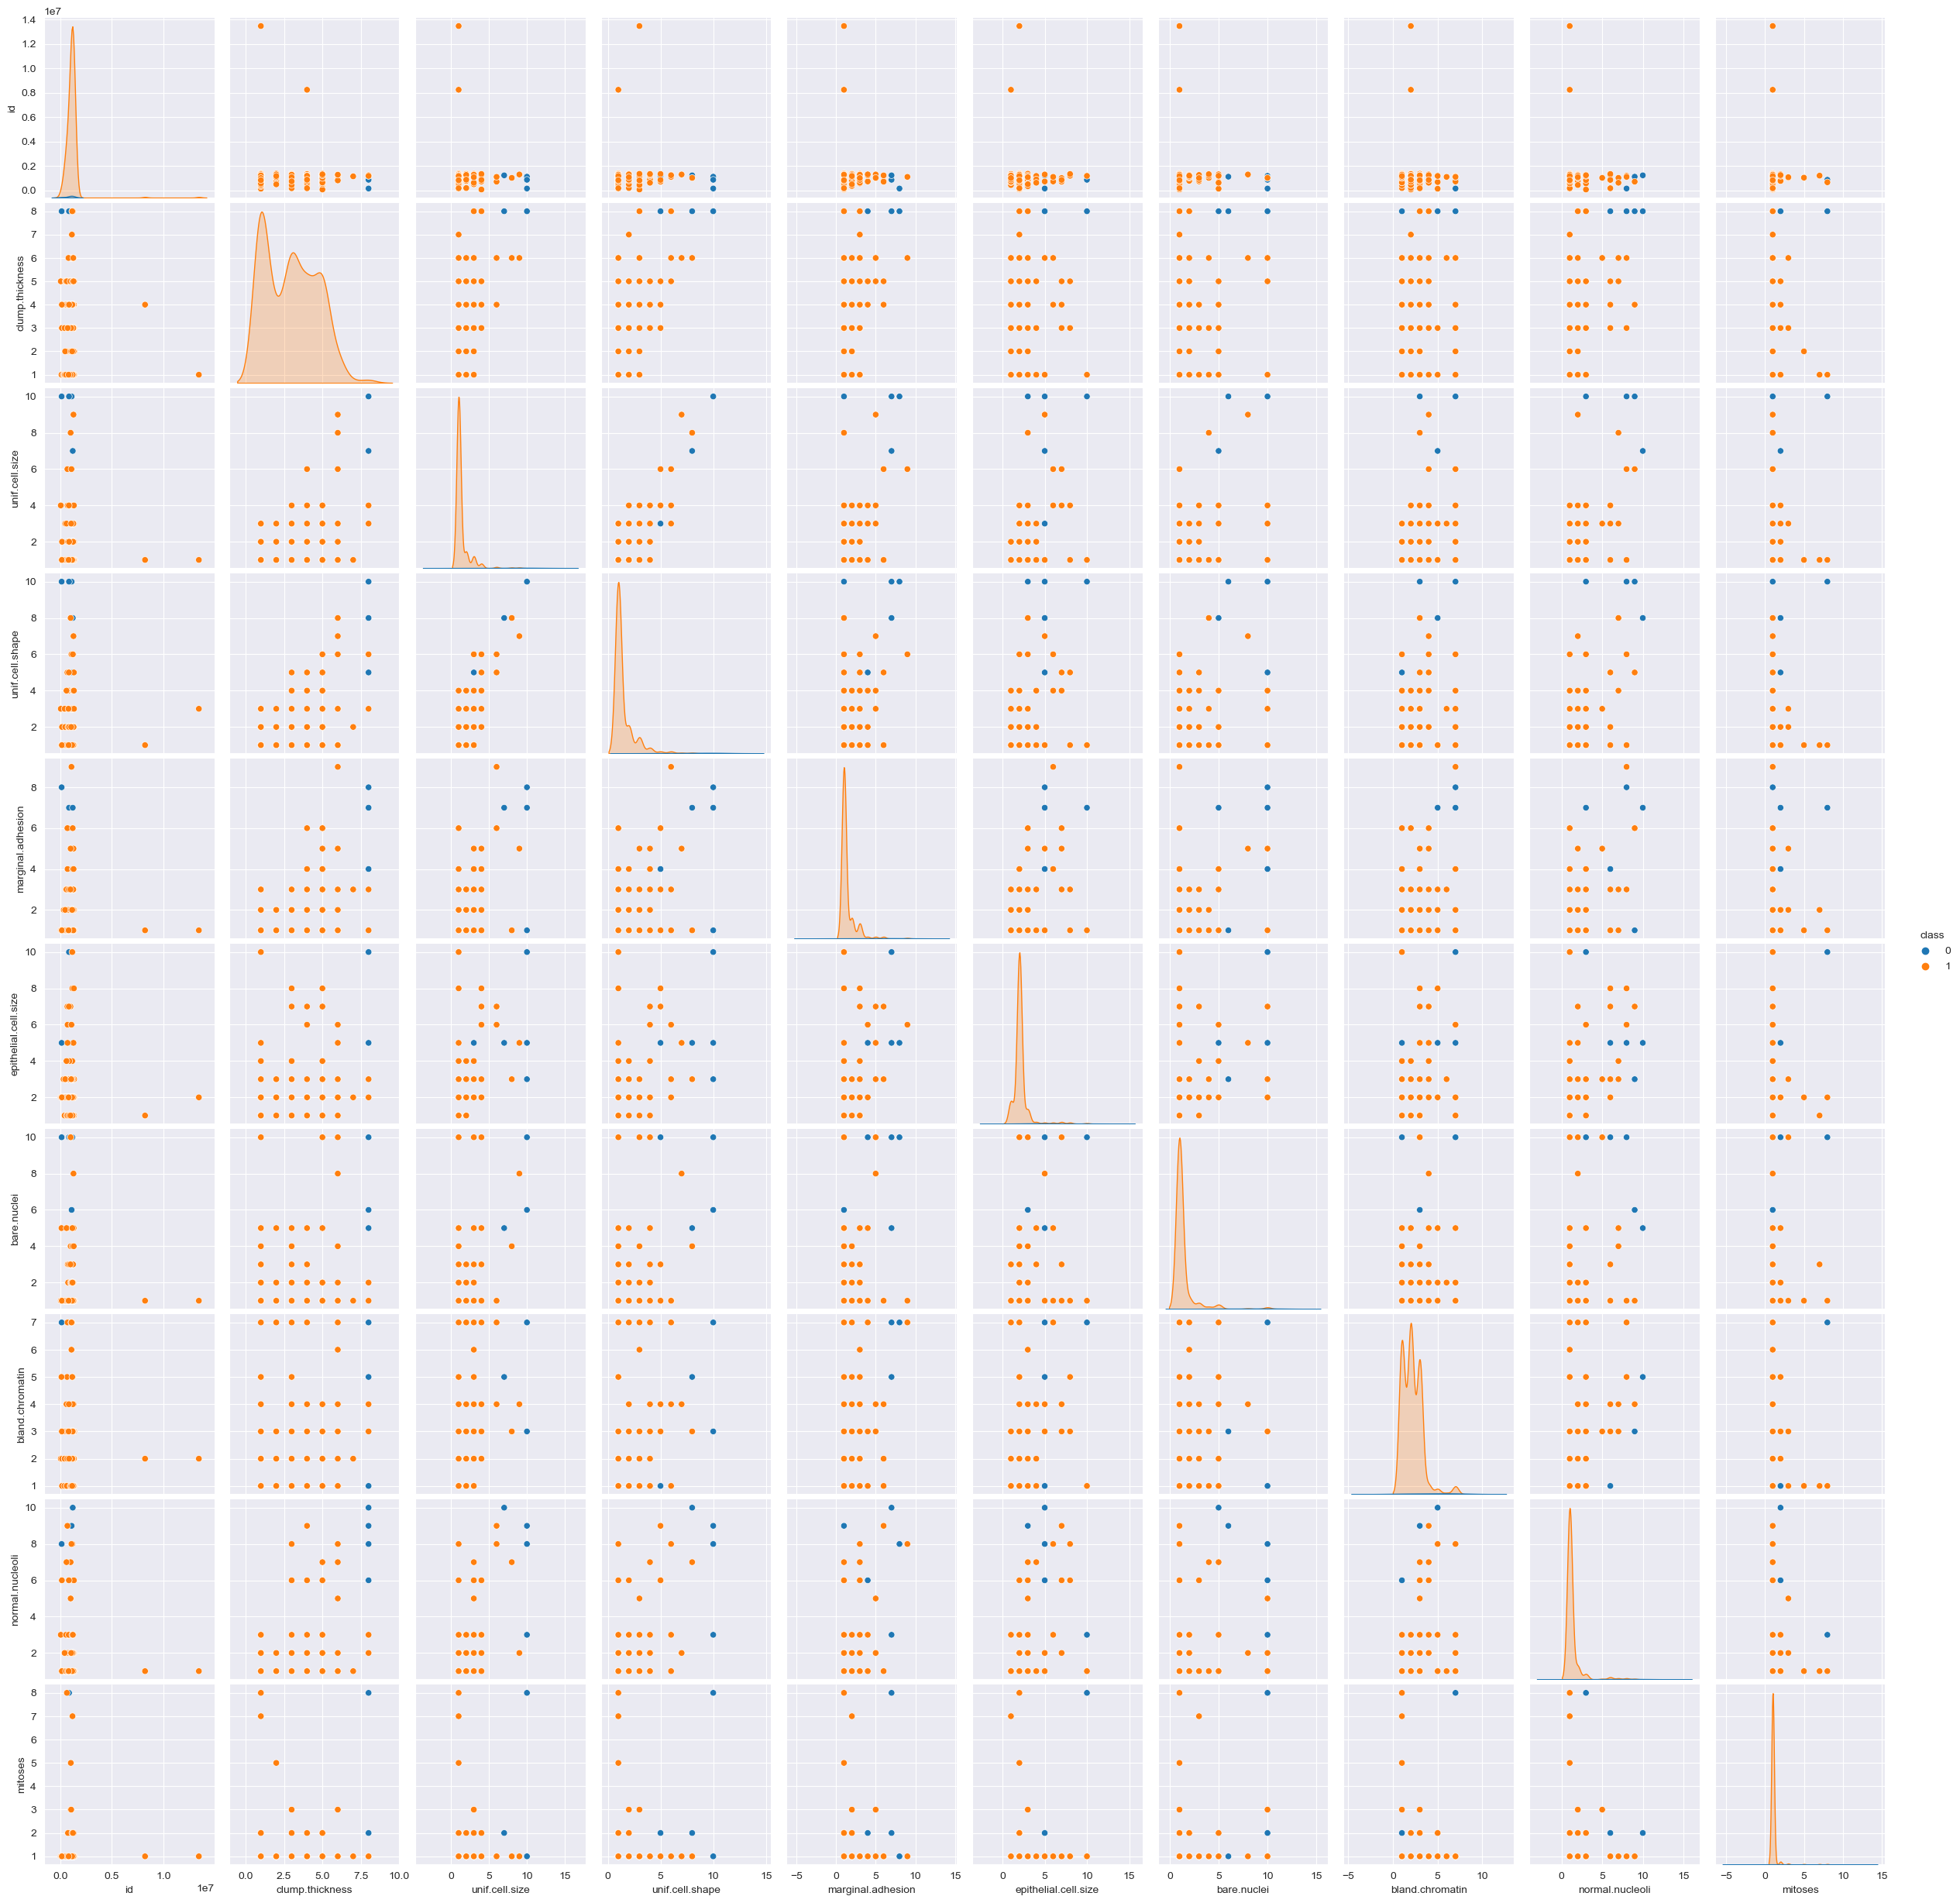

In [19]:
sns.pairplot(df, hue='class')
plt.show()

<h3>2.Treinar um modelo para classificar o tumor.<h3>

In [104]:
#Dividir treino e teste 
x_train = df.copy(deep=True).drop(columns=['id', 'class'])
y_train = df[['class']].copy(deep=True)

x_test = df_test.copy(deep=True).drop(columns=['id', 'class'])
y_test = df_test[['class']].copy(deep=True)

In [193]:
#Treinar o modelo 
logit = sm.Logit(y_train, x_train.astype(float))
lg = logit.fit()

Optimization terminated successfully.
         Current function value: 0.074965
         Iterations 10


In [106]:
# Print the Logistic Regression Summary
print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:                  class   No. Observations:                  371
Model:                          Logit   Df Residuals:                      362
Method:                           MLE   Df Model:                            8
Date:                Wed, 06 Mar 2024   Pseudo R-squ.:                -0.04951
Time:                        17:29:59   Log-Likelihood:                -27.812
converged:                       True   LL-Null:                       -26.500
Covariance Type:            nonrobust   LLR p-value:                     1.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
clump.thickness          0.9180      0.372      2.470      0.014       0.190       1.646
unif.cell.size          -0.6076      0.433     -1.403      0.161      -1.457       0.241
unif.cell.sh

In [107]:
pred_train = lg.predict(x_train) > 0.5
pred_train = np.round(pred_train)

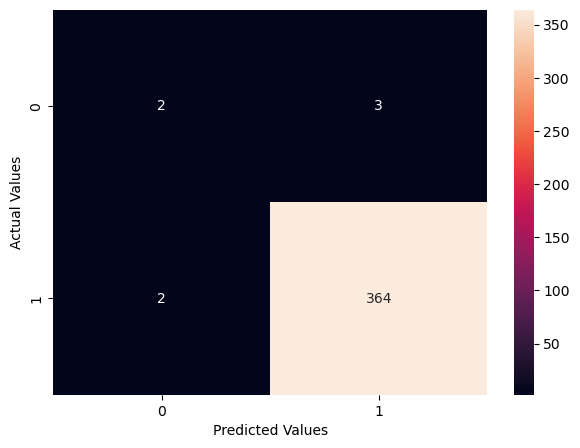

In [108]:
cm = confusion_matrix(y_train, pred_train)

# Plot the Confusion Matrix (CM)
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [109]:
# Checking Accuracy score
print(accuracy_score(y_train, pred_train))
# Checking Recall score
print(recall_score(y_train, pred_train))

0.9865229110512129
0.994535519125683


<h3>3.Classificar os dados de teste.<h3>

In [200]:
pred_test = lg.predict(x_test) > 0.5
pred_test = np.round(pred_test)

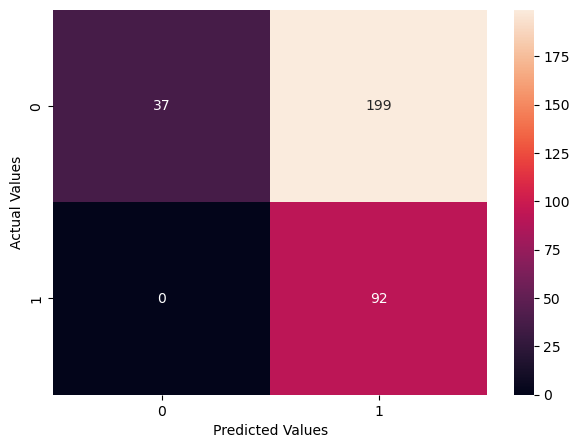

In [201]:
cm = confusion_matrix(y_test, pred_test)

# Plot the Confusion Matrix (CM)
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [112]:
# Checking Accuracy score
print(accuracy_score(y_test, pred_test))
# Checking Recall score
print(recall_score(y_test, pred_test))

0.3932926829268293
1.0


<h3>4.Calcule a matrix de confusão, acurácia, curva ROC, taxa de
verdadeiros positivos e de verdadeiros negativos para o
conjunto de teste.<h3>

In [132]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train.values.ravel())
# Estimando as probabilidades
knn_prob = knn.predict_proba(x_test)
probs = knn_prob[:, 1]
rfp, rvp,lim = roc_curve(y_test, probs)

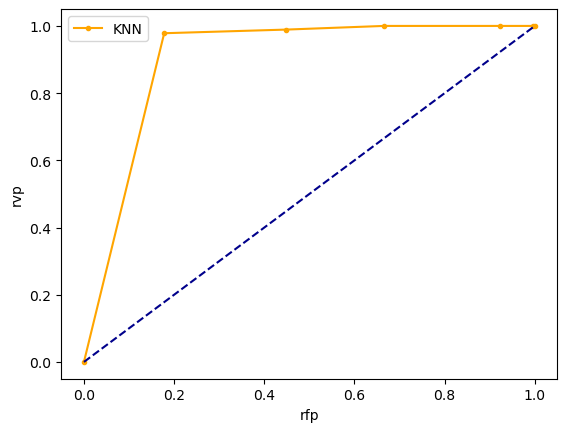

In [134]:
# Gráfico da curva roc
plt.plot(rfp, rvp, marker='.', label='KNN',color="orange")
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
# alterando o nome dos eixos
plt.xlabel('rfp')
plt.ylabel('rvp')
# Legenda
plt.legend()
# Mostrando o gráfico
plt.show()

In [205]:
pred_test = lg.predict(x_test) > 0.60
pred_test = np.round(pred_test)

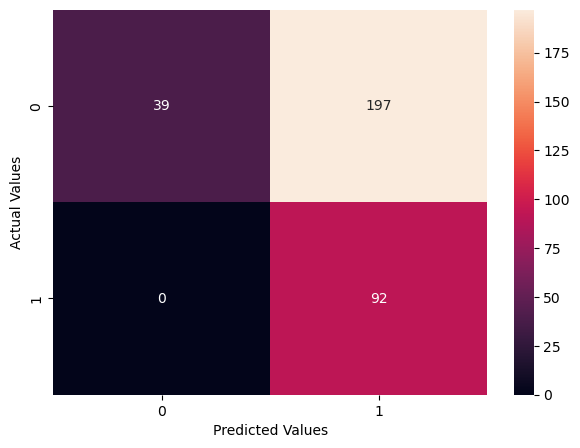

In [206]:
cm = confusion_matrix(y_test, pred_test)

# Plot the Confusion Matrix (CM)
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

<h3>5.Explorar técnicas para lidar com desbalanceamento.<h3>

In [207]:
#Dados desbalanceados, precisamos popular com mais dados de classe 0
# Fit SMOTE on Train data
smot = SMOTE(sampling_strategy=0.4, k_neighbors=4, random_state=1)
x_train_over, y_train_over = smot.fit_resample(x_train, y_train)

In [223]:
y_train_over['class'].value_counts(normalize=True)

class
1    0.714844
0    0.285156
Name: proportion, dtype: float64

In [208]:
#Retreinar o modelo com os dados de oversampling
logit = sm.Logit(y_train_over, x_train_over.astype(float))
lg = logit.fit()

Optimization terminated successfully.
         Current function value: 0.129655
         Iterations 10


In [209]:
# Print the Logistic Regression Summary
print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:                  class   No. Observations:                  512
Model:                          Logit   Df Residuals:                      503
Method:                           MLE   Df Model:                            8
Date:                Thu, 07 Mar 2024   Pseudo R-squ.:                  0.7831
Time:                        17:43:00   Log-Likelihood:                -66.383
converged:                       True   LL-Null:                       -306.05
Covariance Type:            nonrobust   LLR p-value:                 1.903e-98
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
clump.thickness          1.2344      0.273      4.516      0.000       0.699       1.770
unif.cell.size          -1.5623      0.342     -4.565      0.000      -2.233      -0.892
unif.cell.sh

In [210]:
pred_train_over = lg.predict(x_train_over) > 0.5
pred_train_over = np.round(pred_train_over)

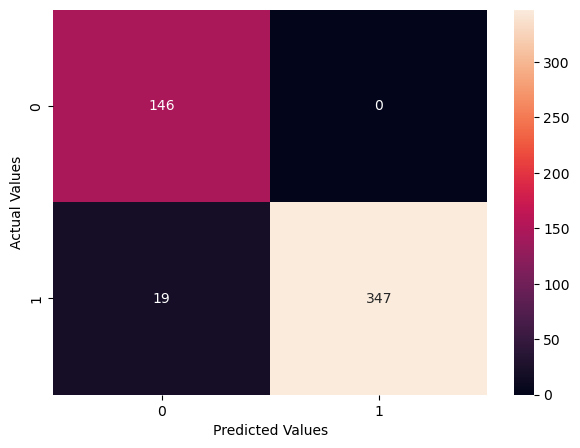

In [211]:
cm = confusion_matrix(y_train_over, pred_train_over)

# Plot the Confusion Matrix (CM)
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [212]:
#Classificação dos dados de teste
pred_test = lg.predict(x_test) > 0.4
pred_test = np.round(pred_test)

In [219]:
# Function to plot a Confusion Matrix
def make_confusion_matrix(predictors, target):
    '''
    Plot the Confusion Matrix with percentages.
    
    model: classifier model
    predictors: independent variables
    target: dependent variable
    '''
    pred_test = lg.predict(x_test) > 0.4
    pred_test = np.round(pred_test)
    cm = metrics.confusion_matrix(target, pred_test)
    
    labels = np.asarray([
        [f'{item}\n{(item / cm.flatten().sum())*100:.2f}%'] for item in cm.flatten()
    ]).reshape(2, 2)
    
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

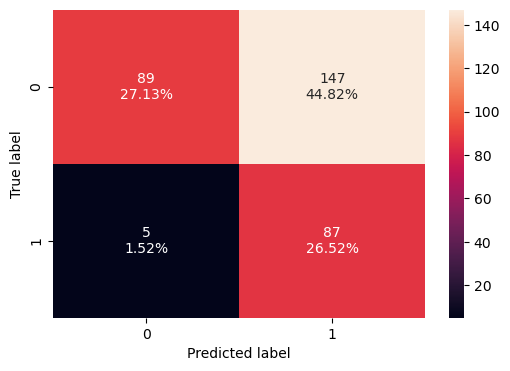

In [220]:
make_confusion_matrix(x_test, y_test)

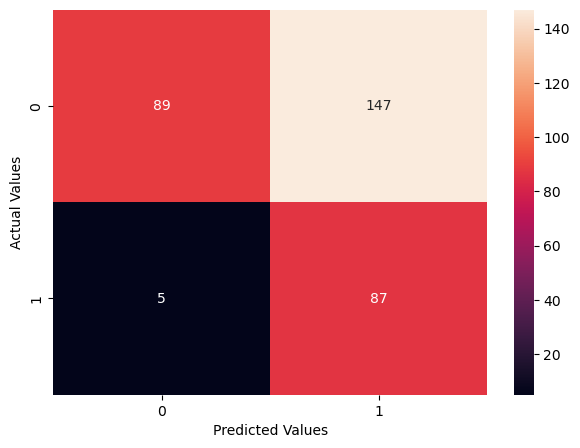

In [213]:
cm = confusion_matrix(y_test, pred_test)

# Plot the Confusion Matrix (CM)
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [176]:
# Checking Accuracy score
print(accuracy_score(y_test, pred_test))
# Checking Recall score
print(recall_score(y_test, pred_test))

0.5365853658536586
0.9456521739130435


In [153]:
knn.fit(x_train_over, y_train_over.values.ravel())
# Estimando as probabilidades
knn_prob = knn.predict_proba(x_test)
probs = knn_prob[:, 1]
rfp, rvp,lim = roc_curve(y_test, probs)

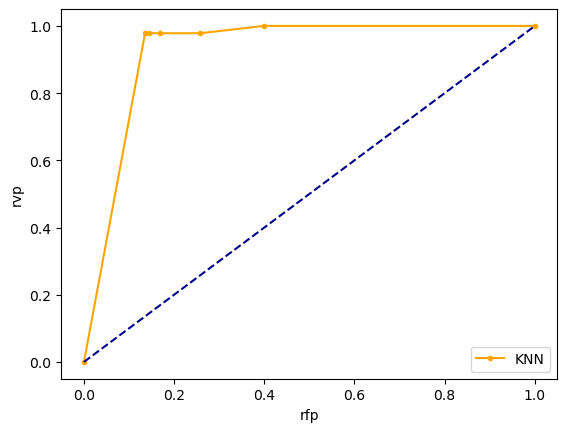

In [154]:
# Gráfico da curva roc
plt.plot(rfp, rvp, marker='.', label='KNN',color="orange")
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
# alterando o nome dos eixos
plt.xlabel('rfp')
plt.ylabel('rvp')
# Legenda
plt.legend()
# Mostrando o gráfico
plt.show()

#### Teste com decision tree

In [177]:

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [179]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(x_train_over, y_train_over)

DecisionTreeClassifier(random_state=1)

In [180]:
print(f'Accuracy on the Training Set: {dTree.score(x_train_over, y_train_over)}')
print(f'Accuracy on the Test Set: {dTree.score(x_test, y_test)}')

Accuracy on the Training Set: 1.0
Accuracy on the Test Set: 0.5853658536585366


In [181]:
# Checking the number of positives (default)
y.sum()

class    366
dtype: int64

In [182]:
# Function to plot a Confusion Matrix
def make_confusion_matrix(model, predictors, target):
    '''
    Plot the Confusion Matrix with percentages.
    
    model: classifier model
    predictors: independent variables
    target: dependent variable
    '''
    
    y_pred = model.predict(predictors)
    cm = metrics.confusion_matrix(target, y_pred)
    
    labels = np.asarray([
        [f'{item}\n{(item / cm.flatten().sum())*100:.2f}%'] for item in cm.flatten()
    ]).reshape(2, 2)
    
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [183]:
# Function to calculate different matrics
def model_performance(model, predictors, target):
    '''
    Function to compute different metrics to check a Decision Tree model performance.
    
    model: classifier
    predictors: independent variables
    target: dependent variable
    '''
    
    # Predict using the independent variables
    pred = model.predict(predictors)
    
    acc = metrics.accuracy_score(target, pred) # compute Accuracy
    recall = metrics.recall_score(target, pred) # compute Recall
    precision = metrics.precision_score(target, pred) # compute Precision
    f1 = metrics.f1_score(target, pred) # compute F1-Score
    
    # Create a DataFrame of metrics
    df_perf = pd.DataFrame(
        {'Accuracy': acc, 'Recall': recall, 'Precision': precision, 'F1-Score': f1}, index=[0])
    
    return df_perf

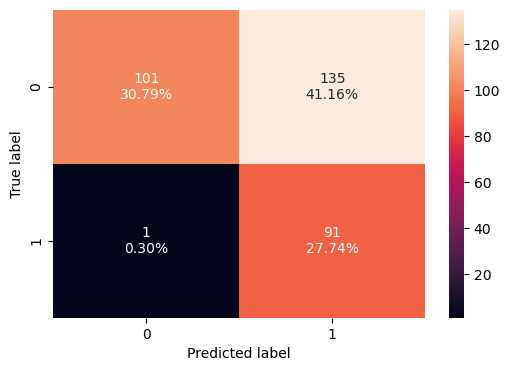

In [184]:
make_confusion_matrix(dTree, x_test, y_test)

In [190]:
print('Training Set')
display(model_performance(dTree, x_train_over, y_train_over))

Training Set


,Accuracy,Recall,Precision,F1-Score
0,1.0,1.0,1.0,1.0


In [189]:
print('Test Set')
display(model_performance(dTree, x_test, y_test))

Test Set


,Accuracy,Recall,Precision,F1-Score
0,0.585366,0.98913,0.402655,0.572327


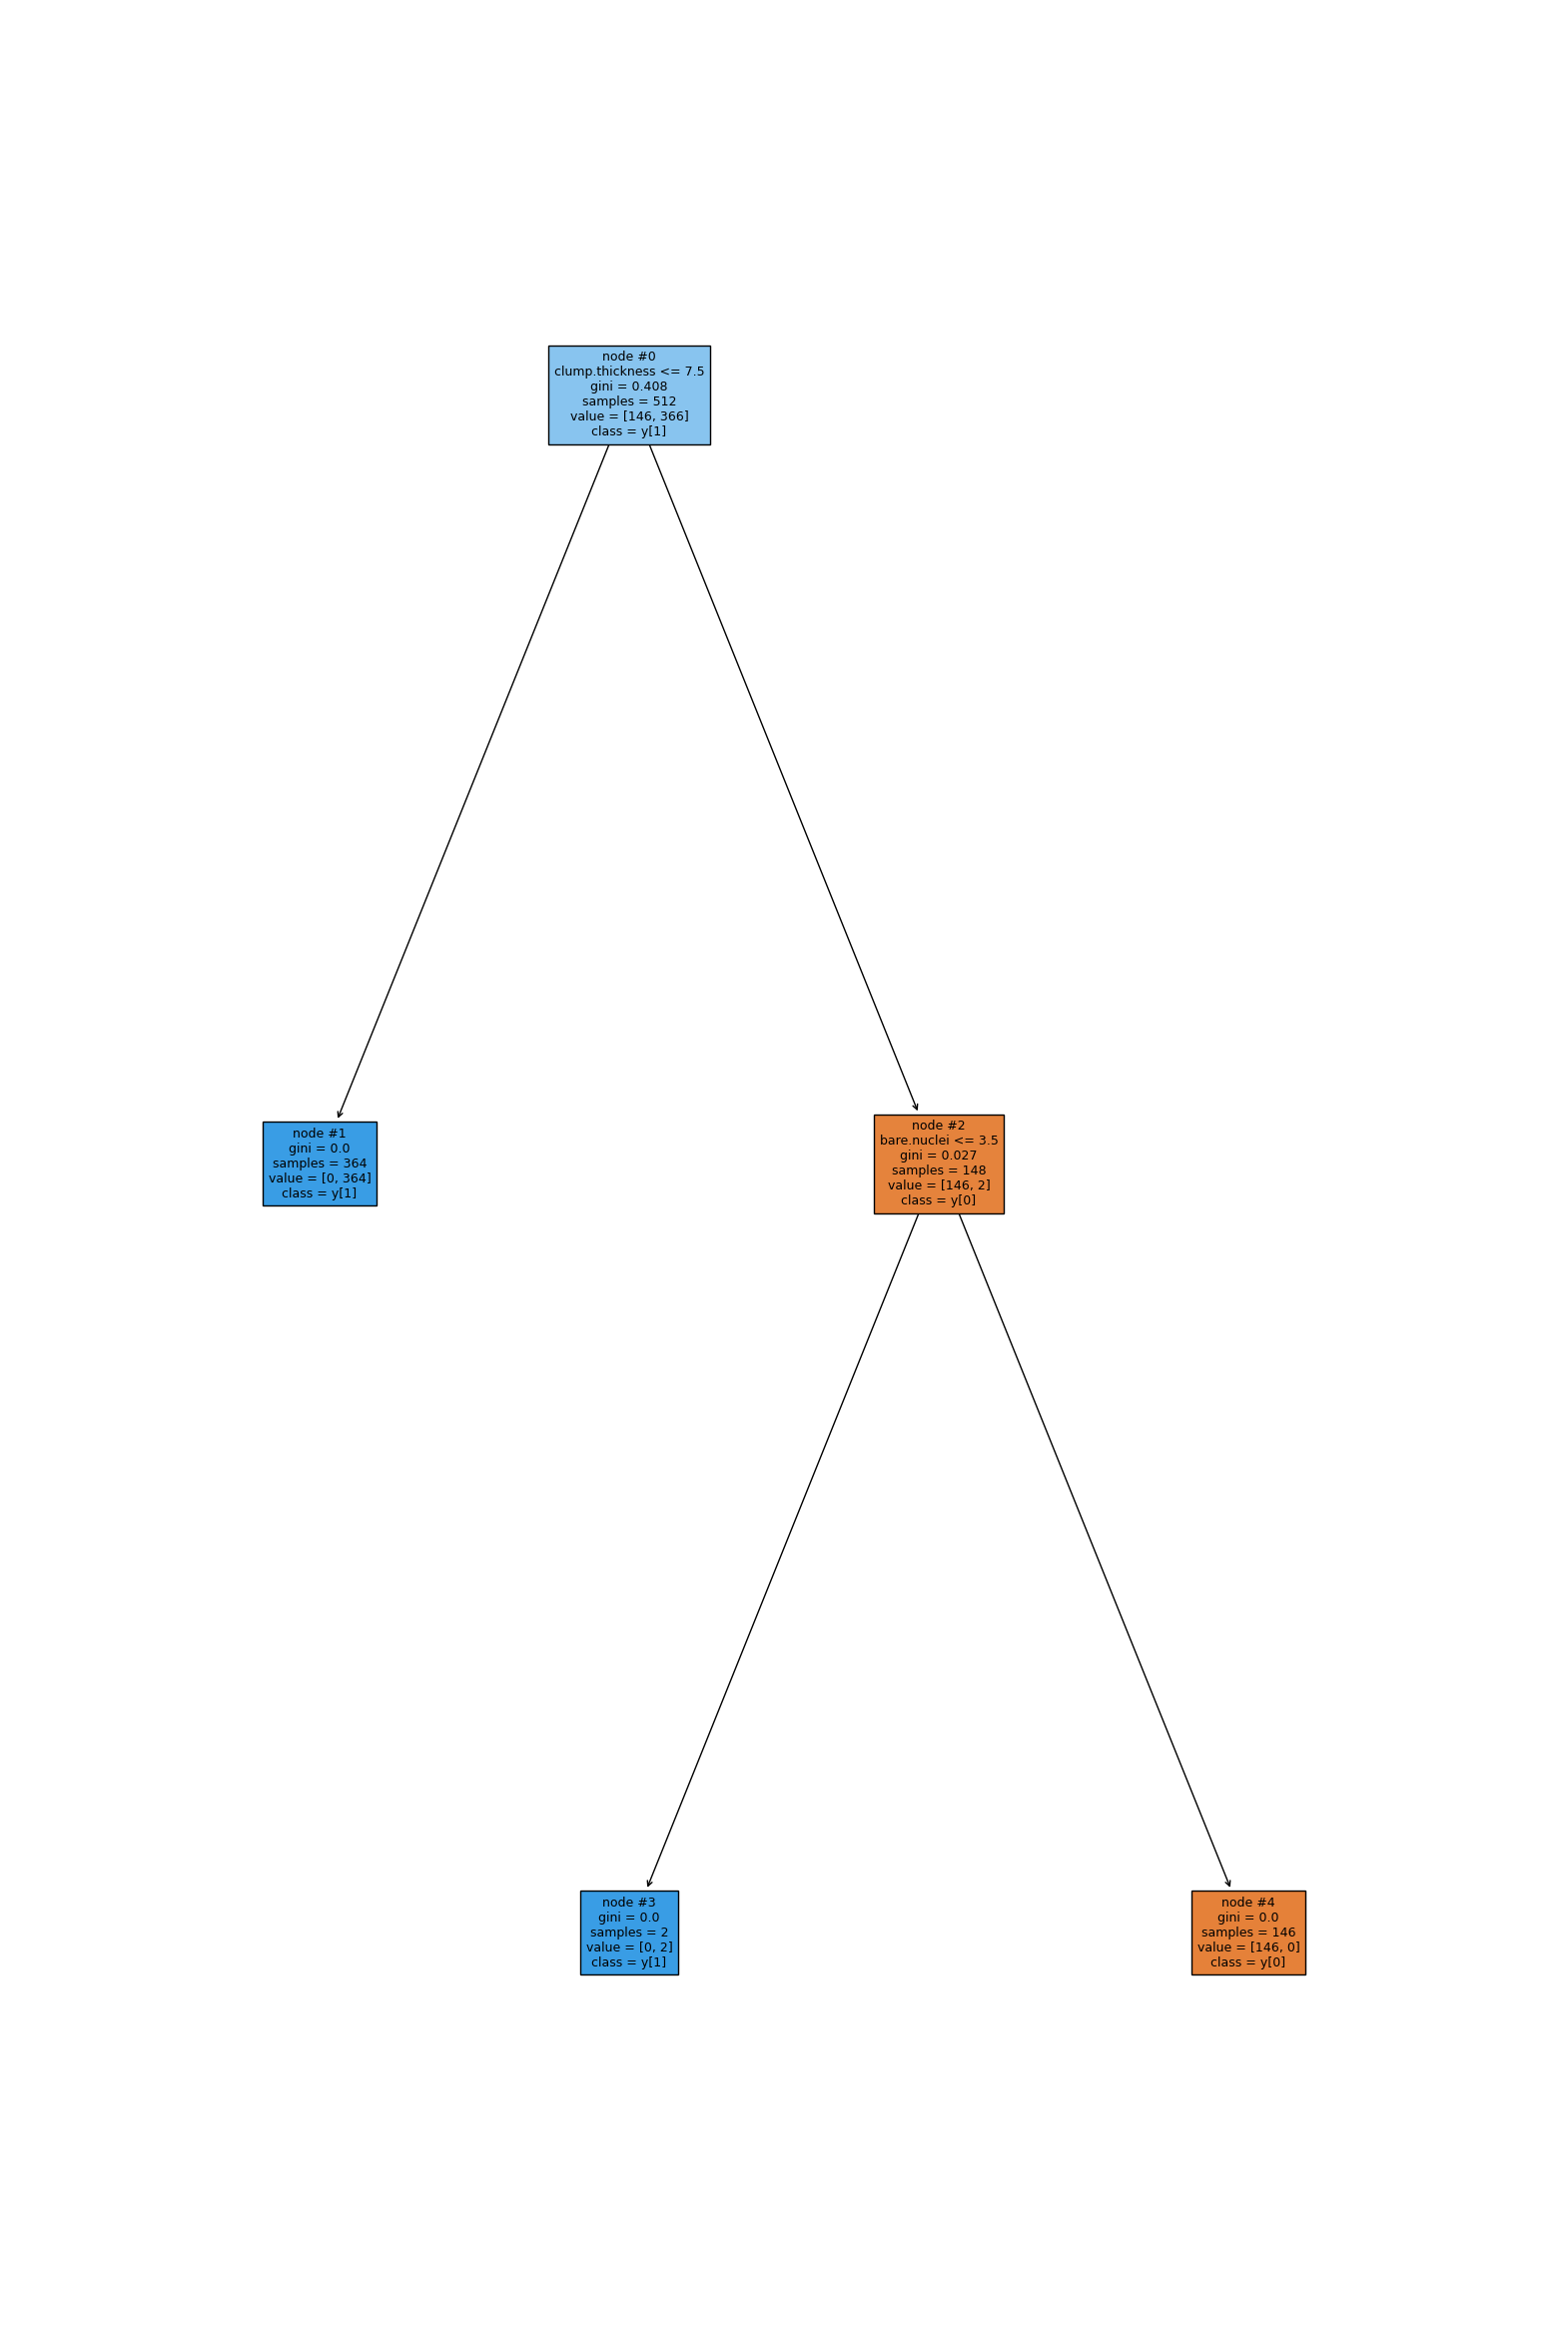

In [186]:
feature_names = list(x_train_over.columns)

plt.figure(figsize=(20, 30))
tree.plot_tree(dTree, feature_names=feature_names, filled=True,
            fontsize=9, node_ids=True, class_names=True);